In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt


In [3]:
covor=np.loadtxt('gen_profiles/covmat_xxl_hiflugcs_xcop.txt')


In [4]:
xgrid_ext=np.loadtxt('gen_profiles/radial_binning.txt')
mean_log=np.loadtxt('gen_profiles/mean_pars.txt')
nsim=10000

In [5]:
profs=np.exp(np.random.multivariate_normal(mean_log,covor,size=nsim))

(array([ 270., 1483., 1977., 1679., 1324.,  990.,  679.,  480.,  330.,
         232.,  151.,  105.,   68.,   52.,   42.,   31.,   27.,   18.,
          17.,   11.,    6.,    5.,    4.,    3.,    4.,    3.,    4.,
           3.,    0.,    2.]),
 array([ 0.26919198,  1.20880348,  2.14841498,  3.08802648,  4.02763798,
         4.96724948,  5.90686098,  6.84647248,  7.78608398,  8.72569549,
         9.66530699, 10.60491849, 11.54452999, 12.48414149, 13.42375299,
        14.36336449, 15.30297599, 16.24258749, 17.18219899, 18.12181049,
        19.06142199, 20.00103349, 20.940645  , 21.8802565 , 22.819868  ,
        23.7594795 , 24.699091  , 25.6387025 , 26.578314  , 27.5179255 ,
        28.457537  ]),
 <BarContainer object of 30 artists>)

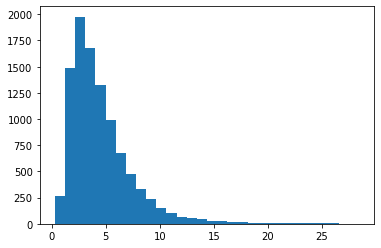

In [6]:
plt.hist(profs[:,len(mean_log)-1],bins=30)

In [7]:
allz=profs[:,len(mean_log)-3]
allkt=profs[:,len(mean_log)-1]
allm5=profs[:,len(mean_log)-2]


<Figure size 432x288 with 0 Axes>

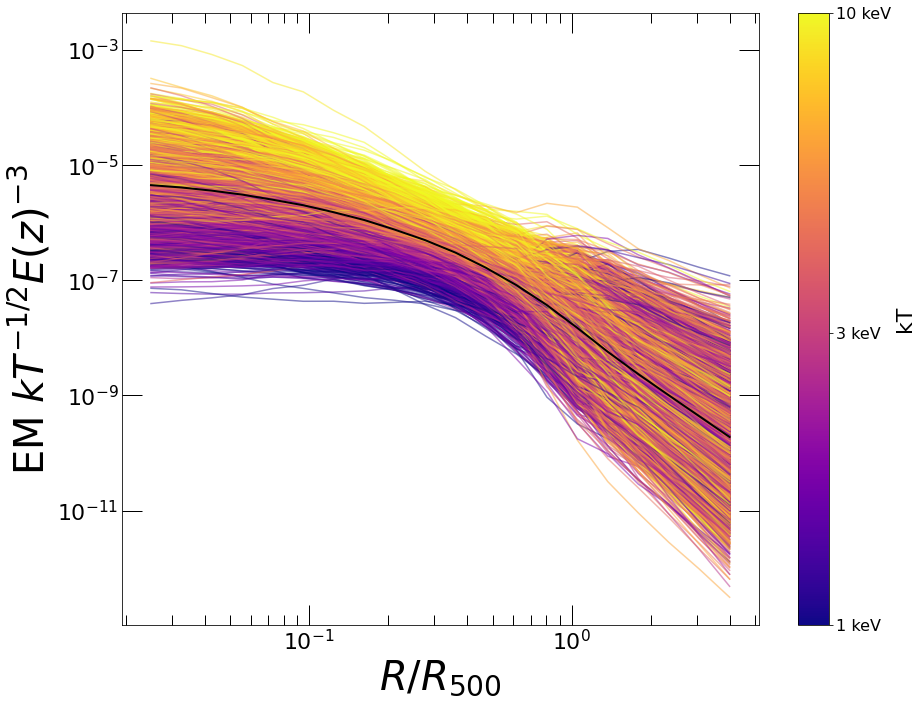

In [8]:
import matplotlib.cm as cm


cmap = plt.get_cmap('plasma')
mappable = cm.ScalarMappable(cmap=cmap)
mappable.set_array([])
#mappable.set_clim(np.min(np.log(allkt)),np.max(np.log(allkt)))
colorlog=True
if colorlog:
    mappable.set_clim(0.,np.log(10.))
else:
    mappable.set_clim(1.,10.)

lowkt=np.where(allkt<1.)
highkt=np.where(allkt>10.)
kt_col=np.copy(allkt)
kt_col[lowkt]=1.
kt_col[highkt]=10.

plt.clf()
fig=plt.figure(figsize=(13,10))
ax_size = [0.14, 0.12,
           0.85, 0.85]
ax = fig.add_axes(ax_size)
ax.minorticks_on()
ax.tick_params(length=20, width=1, which='major',direction='in',right='on',top='on')
ax.tick_params(length=10, width=1, which='minor',direction='in',right='on',top='on')
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.xscale('log')
plt.yscale('log')

for i in range(nsim):
    if colorlog:
        col=mappable.to_rgba(np.log(kt_col[i]))
    else:
        col=mappable.to_rgba(kt_col[i])
    plt.plot(xgrid_ext,profs[i,:len(xgrid_ext)],color=col,alpha=0.5)
    
if colorlog:
    cbar = plt.colorbar(mappable,ticks=[0.,np.log(3.),np.log(10.)])
else:
    cbar = plt.colorbar(mappable,ticks=[1.,3.,10.])

cbar.set_ticklabels([r'1 keV', r'3 keV', r'10 keV'])
cbar.set_label(r'kT', fontsize=22)
cbar.ax.tick_params(labelsize=16)

plt.plot(xgrid_ext,np.exp(mean_log)[:len(xgrid_ext)],color='black',linewidth=2)
plt.xlabel('$R/R_{500}$',fontsize=40)
plt.ylabel('EM $kT^{-1/2}E(z)^{-3}$',fontsize=40)
plt.savefig('figures/simulation_profiles.pdf')

Text(0, 0.5, 'EM $kT^{-1/2}(1+z)^{-3}$')

<Figure size 432x288 with 0 Axes>

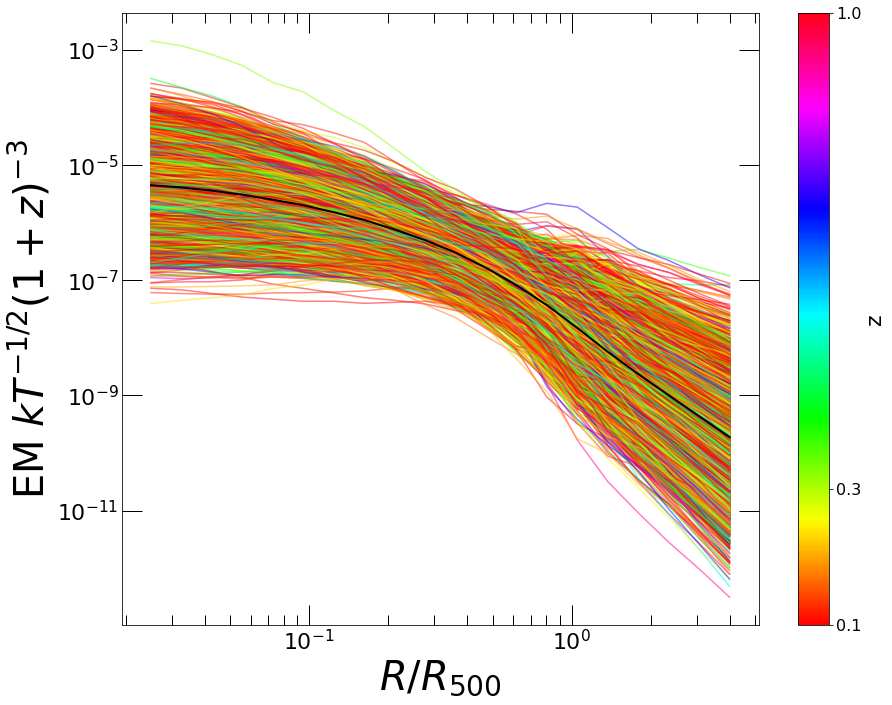

In [9]:

cmap = plt.get_cmap('hsv')
mappable = cm.ScalarMappable(cmap=cmap)
mappable.set_array([])
#mappable.set_clim(np.min(np.log(allkt)),np.max(np.log(allkt)))
colorlog=False
if colorlog:
    mappable.set_clim(np.log(0.1),np.log(1.))
else:
    mappable.set_clim(0.1,1.)


plt.clf()
fig=plt.figure(figsize=(13,10))
ax_size = [0.14, 0.12,
           0.85, 0.85]
ax = fig.add_axes(ax_size)
ax.minorticks_on()
ax.tick_params(length=20, width=1, which='major',direction='in',right='on',top='on')
ax.tick_params(length=10, width=1, which='minor',direction='in',right='on',top='on')
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.xscale('log')
plt.yscale('log')

for i in range(nsim):
    if colorlog:
        col=mappable.to_rgba(np.log(allz[i]))
    else:
        col=mappable.to_rgba(allz[i])
    plt.plot(xgrid_ext,profs[i,:len(xgrid_ext)],color=col,alpha=0.5)
    
if colorlog:
    cbar = plt.colorbar(mappable,ticks=[np.log(0.1),np.log(0.3),np.log(1.)])
else:
    cbar = plt.colorbar(mappable,ticks=[0.1,0.3,1.])

cbar.set_ticklabels([r'0.1', r'0.3', r'1.0'])
cbar.set_label(r'z', fontsize=22)
cbar.ax.tick_params(labelsize=16)

plt.plot(xgrid_ext,np.exp(mean_log)[:len(xgrid_ext)],color='black',linewidth=2)
plt.xlabel('$R/R_{500}$',fontsize=40)
plt.ylabel('EM $kT^{-1/2}(1+z)^{-3}$',fontsize=40)


(array([7.735e+03, 1.496e+03, 4.250e+02, 1.540e+02, 8.400e+01, 3.100e+01,
        3.100e+01, 1.500e+01, 1.000e+01, 8.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.51221331e-03, 5.83532816e-01, 1.16155342e+00, 1.73957402e+00,
        2.31759463e+00, 2.89561523e+00, 3.47363583e+00, 4.05165643e+00,
        4.62967704e+00, 5.20769764e+00, 5.78571824e+00, 6.36373885e+00,
        6.94175945e+00, 7.51978005e+00, 8.09780066e+00, 8.67582126e+00,
        9.25384186e+00, 9.83186246e+00, 1.04098831e+01, 1.09879037e+01,
        1.15659243e+01, 1.21439449e+01, 1.27219655e+01, 1.32999861e+01,
        1.38780067e+01, 1.44560273e+01, 1.50340479e+01, 1.56120685e+01,
        1.61900891e+01, 1.67681097e+01, 1.73461303e+01]),
 <BarContainer object of 30 artists>)

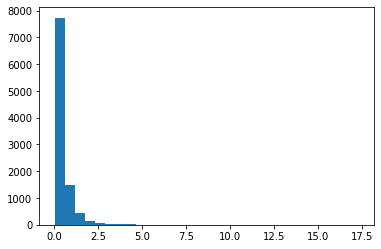

In [10]:
plt.hist(allz,bins=30)


In [12]:
#print(allz)

In [13]:
highz=np.where(allz>0.8)
#print(allz[highz])

In [14]:
print(allm5[highz])

[7.31557239e+13 5.44846116e+14 9.64731032e+13 ... 1.00086061e+15
 1.33254955e+14 1.56810657e+14]


(array([1.000e+00, 1.400e+01, 1.230e+02, 6.880e+02, 1.818e+03, 2.871e+03,
        2.672e+03, 1.375e+03, 3.690e+02, 6.900e+01]),
 array([12.2308507 , 12.58604214, 12.94123359, 13.29642504, 13.65161649,
        14.00680793, 14.36199938, 14.71719083, 15.07238228, 15.42757372,
        15.78276517]),
 <BarContainer object of 10 artists>)

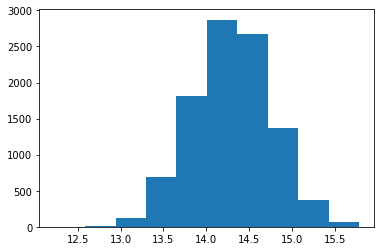

In [15]:
plt.hist(np.log10(allm5))

In [32]:
import astropy.units as u
from astropy.cosmology import *
cosmo = FlatLambdaCDM(
        H0=67.77 * u.km / u.s / u.Mpc,
        Om0=0.307115)  # , Ob0=0.048206)

eofz=cosmo.efunc(allz)

okz = np.where(allz<2)

8.846306258720883


<Figure size 432x288 with 0 Axes>

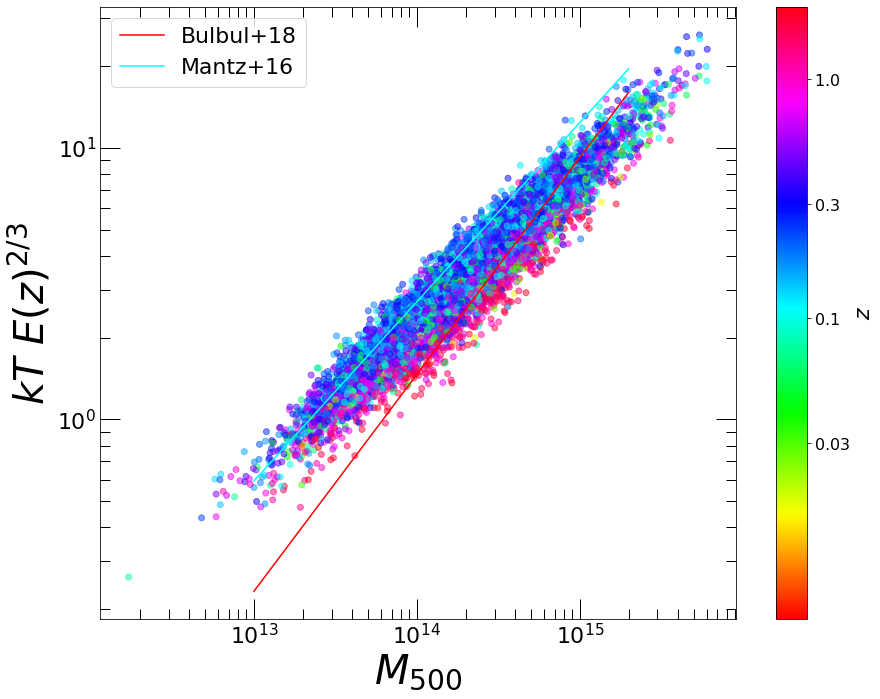

In [33]:
plt.clf()
fig=plt.figure(figsize=(13,10))
ax_size = [0.14, 0.12,
           0.85, 0.85]
ax = fig.add_axes(ax_size)
ax.minorticks_on()
ax.tick_params(length=20, width=1, which='major',direction='in',right='on',top='on')
ax.tick_params(length=10, width=1, which='minor',direction='in',right='on',top='on')
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.xscale('log')
plt.yscale('log')
#colors=np.log(allz[:int(nsim/10)])
#plt.scatter(allm5[:int(nsim/10)],allkt[:int(nsim/10)]/np.power(eofz[:int(nsim/10)],2./3.),c=colors,cmap='hsv',alpha=0.5)

colors=np.log(allz[okz])
plt.scatter(allm5[okz],allkt[okz]/np.power(eofz[okz],2./3.),c=colors,cmap='hsv',alpha=0.5)


cmap = plt.get_cmap('hsv')
mappable = cm.ScalarMappable(cmap=cmap)
mappable.set_array([])
mappable.set_clim(np.min(np.log(allz[okz])),np.max(np.log(allz[okz])))
cbar = plt.colorbar(mappable,ticks=[np.log(0.03),np.log(0.1),np.log(0.3),np.log(1.),np.log(3.)])
cbar.set_ticklabels([r'$0.03$',r'$0.1$', r'$0.3$', r'$1.0$', r'$3.0$'])
cbar.set_label(r'$z$', fontsize=22)
cbar.ax.tick_params(labelsize=16)

plt.xlabel('$M_{500}$',fontsize=40)
plt.ylabel('$kT$ $E(z)^{2/3}$',fontsize=40)

x=np.logspace(13.,15.3,100)
y=6.41*np.power(x/6.35e14,0.799)
plt.plot(x,y,color='red',label='Bulbul+18')
print(np.exp(2.18))
mantz=np.exp(2.18)*np.power(x/6e14,0.66)
plt.plot(x,mantz,color='cyan',label='Mantz+16')

plt.legend(fontsize=22)
plt.savefig('figures/simulated_M_T.pdf')

/home/deckert/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

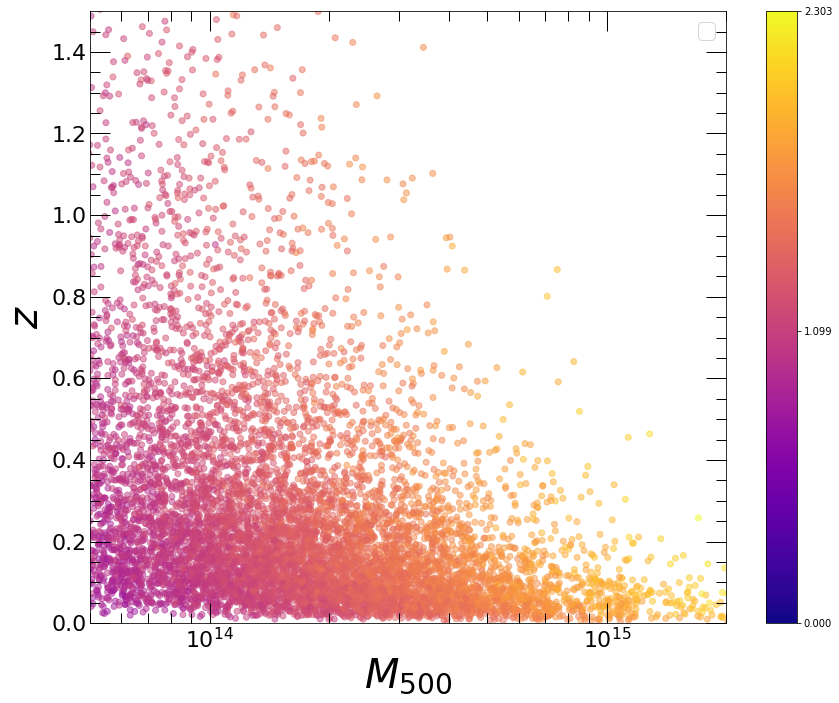

In [145]:
plt.clf()
fig=plt.figure(figsize=(13,10))
ax_size = [0.14, 0.12,
           0.85, 0.85]
ax = fig.add_axes(ax_size)
ax.minorticks_on()
ax.tick_params(length=20, width=1, which='major',direction='in',right='on',top='on')
ax.tick_params(length=10, width=1, which='minor',direction='in',right='on',top='on')
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.xscale('log')
#plt.yscale('log')

colors = np.log(allkt)
cmap = plt.get_cmap('plasma')
mappable = cm.ScalarMappable(cmap=cmap)
mappable.set_array([])
#mappable.set_clim(np.min(np.log(allkt)),np.max(np.log(allkt)))
colorlog=True
if colorlog:
    mappable.set_clim(0.,np.log(10.))
else:
    mappable.set_clim(1.,10.)

plt.scatter(allm5,allz,c=colors,cmap=cmap,alpha=0.5)

cbar.set_ticklabels([r'1 keV', r'3 keV', r'10 keV'])
cbar.set_label(r'kT', fontsize=22)
cbar.ax.tick_params(labelsize=16)
if colorlog:
    cbar = plt.colorbar(mappable,ticks=[0.,np.log(3.),np.log(10.)])
else:
    cbar = plt.colorbar(mappable,ticks=[1.,3.,10.])

plt.xlabel('$M_{500}$',fontsize=40)
plt.ylabel('$z$',fontsize=40)
plt.axis([5e13,2e15,0.,1.5])
plt.legend(fontsize=22)

<Figure size 432x288 with 0 Axes>

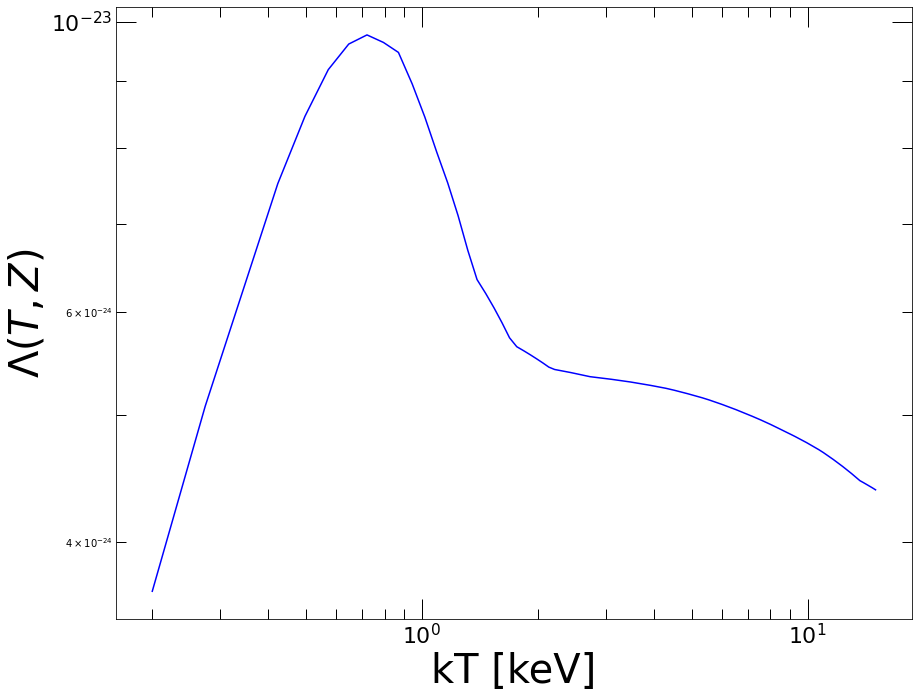

In [21]:
coolfunc=np.loadtxt('gen_profiles/coolfunc.dat')
plt.clf()
fig=plt.figure(figsize=(13,10))
ax_size = [0.14, 0.12,
           0.85, 0.85]
ax = fig.add_axes(ax_size)
ax.minorticks_on()
ax.tick_params(length=20, width=1, which='major',direction='in',right='on',top='on')
ax.tick_params(length=10, width=1, which='minor',direction='in',right='on',top='on')
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.xlabel('kT [keV]',fontsize=40)
plt.ylabel('$\Lambda(T,Z)$',fontsize=40)
plt.plot(coolfunc[:,0],coolfunc[:,1],color='blue')
plt.xscale('log')
plt.yscale('log')

In [22]:
testprof=profs[0][:len(xgrid_ext)]
tlambda=np.interp(allkt[0],coolfunc[:,0],coolfunc[:,1])
print(tlambda)

5.2885134361578755e-24


<p><b>Computing Lx,500 from ScEM(r)</b></p>

<p>
We have

$$ L_{X,500} = \int_0^{R_{500}} 2\pi r \, \Lambda(T,Z) \, EI(r) \, dr$$

with

$$ EI(r) = \int_{-\infty}^{\infty} n_e n_H\, d\ell = ScEM \left(\frac{kT}{10 keV}\right)^{1/2}E(z)^3$$

Making the substitution $r^\prime=r/R_{500}$, we find
$$ L_{X,500} = 2\pi\Lambda R_{500}^2 \int_0^1 EI(r^\prime)\,r^\prime\,dr^\prime$$
</p>


In [23]:
Mpc=3.0856776e+24
msun=1.98892e33

ez2=cosmo.efunc(allz[0])**2
#nfmekal=1e-14/(4.*np.pi*(1.+zxxl[i])*(1.+zxxl[i]))
transf=(60.*180./np.pi)**2/Mpc # conversion from EM to emission integral
resfact=np.sqrt(allkt[0]/10.0)*np.power(ez2,3./2.)
testprof_em=testprof*resfact # emission integral
ad=cosmo.angular_diameter_distance(allz[0]).value*Mpc

rhoc = cosmo.critical_density(allz[0]).value
r500 = np.power(allm5[0]*msun/4.*3./np.pi/500./rhoc,1./3.)
print(r500)
print(r500/Mpc*1e3)
print(testprof_em*xgrid_ext*(r500/Mpc)**2*2.*np.pi*tlambda*Mpc**3)

dx=np.empty(len(xgrid_ext))
dx[0]=xgrid_ext[0]
dx[1:len(xgrid_ext)]=(np.roll(xgrid_ext,-1)-xgrid_ext)[:len(xgrid_ext)-1]
print(dx)
print(xgrid_ext)

3.417801416096525e+24
1107.6339978280703
[1.60037918e+44 1.76258337e+44 1.91482674e+44 1.79886380e+44
 1.44346263e+44 1.39370354e+44 1.13695531e+44 9.51924170e+43
 7.31036058e+43 6.96399881e+43 5.18984333e+43 3.54563377e+43
 2.09104626e+43 9.97905130e+42 3.69494905e+42 1.82015240e+42
 1.04016938e+42 6.44940798e+41 4.58820790e+41 3.05414801e+41]
[0.025      0.00765475 0.00999855 0.01306001 0.01705885 0.0222821
 0.02910465 0.0380162  0.04965638 0.06486066 0.08472034 0.11066085
 0.14454408 0.18880201 0.24661128 0.32212116 0.4207514  0.54958122
 0.71785742 0.9376581 ]
[0.025      0.03265475 0.0426533  0.05571331 0.07277216 0.09505426
 0.12415891 0.16217511 0.21183149 0.27669215 0.36141249 0.47207334
 0.61661742 0.80541943 1.05203071 1.37415187 1.79490326 2.34448448
 3.0623419  4.        ]


In [24]:
lxcum=np.cumsum(testprof_em*xgrid_ext*r500**2*2.*np.pi*tlambda*Mpc*dx)
print(lxcum)

[4.00094794e+42 5.35016092e+42 7.26471061e+42 9.61402833e+42
 1.20764098e+43 1.51818738e+43 1.84909427e+43 2.21097969e+43
 2.57398573e+43 3.02567528e+43 3.46536056e+43 3.85772340e+43
 4.15997175e+43 4.34837825e+43 4.43949986e+43 4.49813082e+43
 4.54189610e+43 4.57734083e+43 4.61027762e+43 4.63891509e+43]


In [25]:
lx_500=np.interp(1.,xgrid_ext,lxcum)
print(lx_500/ez2)

4.360903077683319e+43


In [26]:
print(tlambda*Mpc**3)

1.5537647181443787e+50


In [27]:
def calc_lx(prof,kt,m5,z):
    ez2=cosmo.efunc(z)**2
    rhoc = cosmo.critical_density(z).value
    r500 = np.power(m5*msun/4.*3./np.pi/500./rhoc,1./3.)
    resfact=np.sqrt(kt/10.0)*np.power(ez2,3./2.)
    prof_em=prof*resfact # emission integral
    tlambda=np.interp(kt,coolfunc[:,0],coolfunc[:,1]) # cooling function
    dx=np.empty(len(xgrid_ext))
    dx[0]=xgrid_ext[0]
    dx[1:len(xgrid_ext)]=(np.roll(xgrid_ext,-1)-xgrid_ext)[:len(xgrid_ext)-1]
    #lxcum=np.cumsum(prof_em*xgrid_ext*r500**2*2.*np.pi*tlambda*Mpc*dx) # riemann integral
    lx_500=np.interp(1.,xgrid_ext,lxcum) # evaluated at R500
    return lx_500

In [28]:
calc_lx(testprof,allkt[0],allm5[0],allz[0])

4.4202747817824814e+43

In [29]:
alllx=np.empty(nsim)
for i in range(nsim):
    tprof=profs[i,:len(xgrid_ext)]
    alllx[i]=calc_lx(tprof,allkt[i],allm5[i],allz[i])

<Figure size 432x288 with 0 Axes>

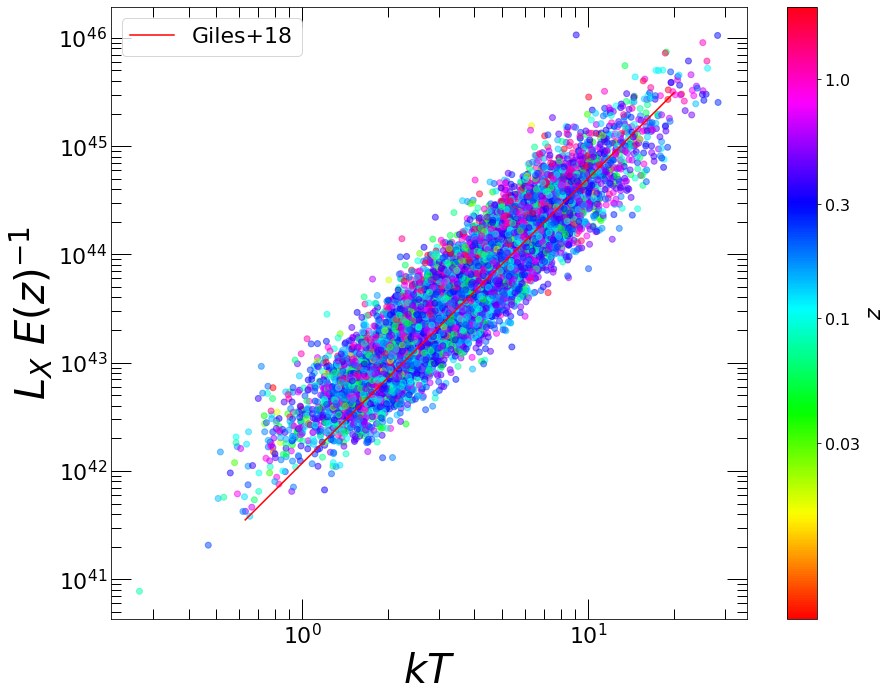

In [34]:
plt.clf()
fig=plt.figure(figsize=(13,10))
ax_size = [0.14, 0.12,
           0.85, 0.85]
ax = fig.add_axes(ax_size)
ax.minorticks_on()
ax.tick_params(length=20, width=1, which='major',direction='in',right='on',top='on')
ax.tick_params(length=10, width=1, which='minor',direction='in',right='on',top='on')
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.xscale('log')
plt.yscale('log')
colors=np.log(allz[okz])
plt.scatter(allkt[okz],alllx[okz]/eofz[okz],c=colors,cmap='hsv',alpha=0.5)


cmap = plt.get_cmap('hsv')
mappable = cm.ScalarMappable(cmap=cmap)
mappable.set_array([])
mappable.set_clim(np.min(np.log(allz[okz])),np.max(np.log(allz[okz])))
cbar = plt.colorbar(mappable,ticks=[np.log(0.03),np.log(0.1),np.log(0.3),np.log(1.),np.log(3.)])
cbar.set_ticklabels([r'$0.03$',r'$0.1$', r'$0.3$', r'$1.0$', r'$3.0$'])
cbar.set_label(r'$z$', fontsize=22)
cbar.ax.tick_params(labelsize=16)

plt.xlabel('$kT$',fontsize=40)
plt.ylabel('$L_X$ $E(z)^{-1}$',fontsize=40)

x=np.logspace(-0.2,1.3,100)
y=3e43*0.71*np.power(x/3.,2.63)
plt.plot(x,y,color='red',label='Giles+18')
#print(np.exp(2.18))
#mantz=np.exp(2.18)*np.power(x/6e14,0.66)
#plt.plot(x,mantz,color='cyan',label='Mantz+16')

plt.legend(fontsize=22)
plt.savefig('figures/Simulated_Lx_T.pdf')

<Figure size 432x288 with 0 Axes>

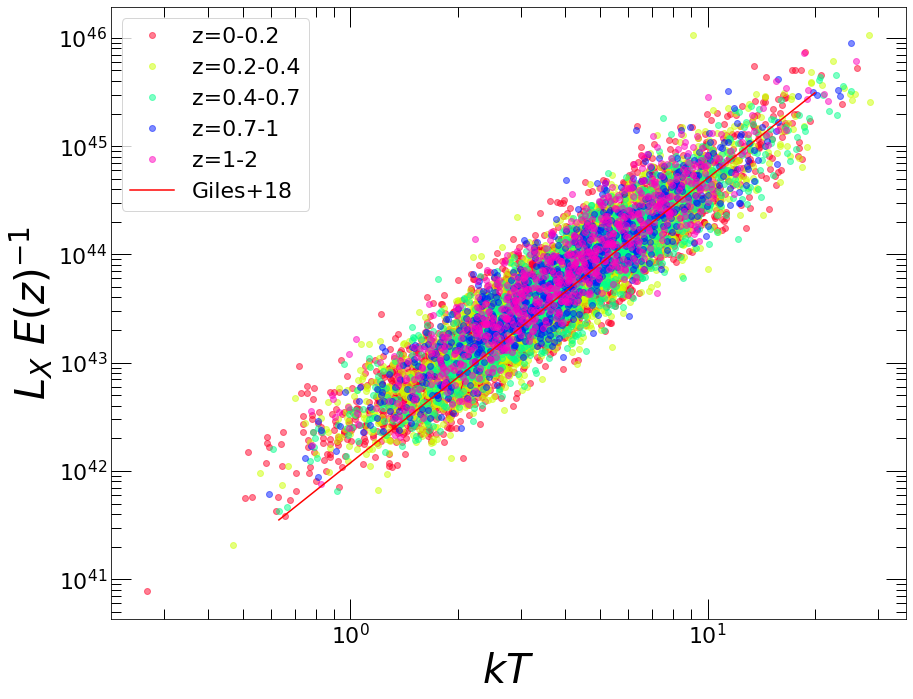

In [50]:
import matplotlib.colors as colors

plt.clf()
fig=plt.figure(figsize=(13,10))
ax_size = [0.14, 0.12,
           0.85, 0.85]
ax = fig.add_axes(ax_size)
ax.minorticks_on()
ax.tick_params(length=20, width=1, which='major',direction='in',right='on',top='on')
ax.tick_params(length=10, width=1, which='minor',direction='in',right='on',top='on')
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.xscale('log')
plt.yscale('log')

zbins=np.array([0., 0.2, 0.4, 0.7, 1.0, 2.0])
nbin = len(zbins)-1

values = range(nbin)
jet = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=jet)
ccc=[]
for i in range(nbin):
    ccc.append(scalarMap.to_rgba(i))


for i in range(nbin):
    
    thisz = np.where(np.logical_and(allz>zbins[i], allz<=zbins[i+1]))
    meanz = (zbins[i] + zbins[i+1])/2.
    
    colors=np.log(allz[thisz])
    plt.plot(allkt[thisz],alllx[thisz]/eofz[thisz], 'o', c=ccc[i], alpha=0.5, 
                label='z=%g-%g' % (zbins[i], zbins[i+1]))


plt.xlabel('$kT$',fontsize=40)
plt.ylabel('$L_X$ $E(z)^{-1}$',fontsize=40)

x=np.logspace(-0.2,1.3,100)
y=3e43*0.71*np.power(x/3.,2.63)
plt.plot(x,y,color='red',label='Giles+18')
#print(np.exp(2.18))
#mantz=np.exp(2.18)*np.power(x/6e14,0.66)
#plt.plot(x,mantz,color='cyan',label='Mantz+16')

plt.legend(fontsize=22)
#plt.savefig('figures/Simulated_Lx_T.pdf')

Text(0.5, 0, 'log $M_{500}$')

<Figure size 432x288 with 0 Axes>

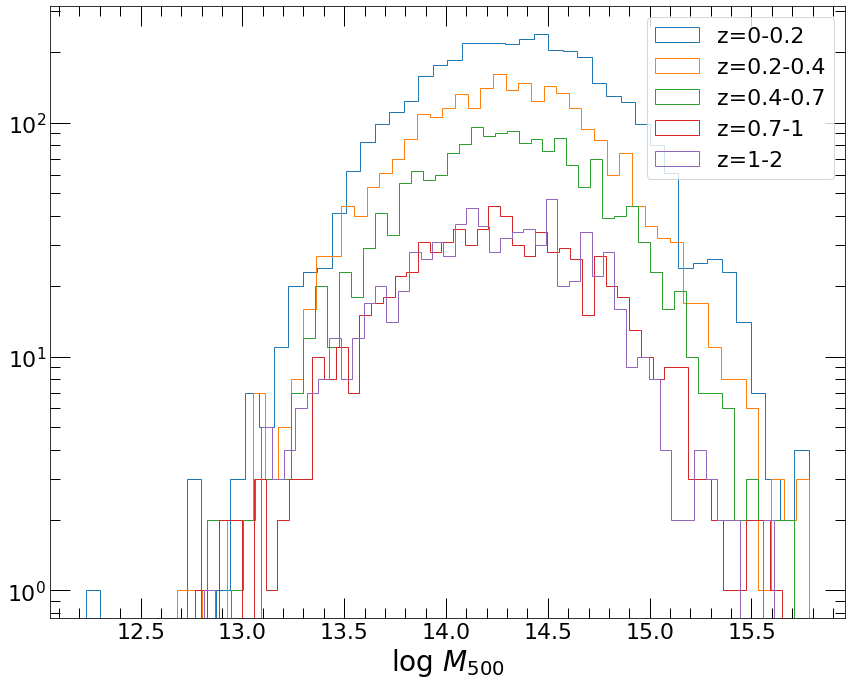

In [57]:
plt.clf()
fig=plt.figure(figsize=(13,10))
ax_size = [0.14, 0.12,
           0.85, 0.85]
ax = fig.add_axes(ax_size)
ax.minorticks_on()
ax.tick_params(length=20, width=1, which='major',direction='in',right='on',top='on')
ax.tick_params(length=10, width=1, which='minor',direction='in',right='on',top='on')
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
#plt.xscale('log')
plt.yscale('log')

for i in range(nbin):
    
    thisz = np.where(np.logical_and(allz>zbins[i], allz<=zbins[i+1]))    
    
    plt.hist(np.log10(allm5[thisz]) , bins=50, label='z=%g-%g' % (zbins[i], zbins[i+1]), histtype='step')
    
plt.legend(fontsize=22)

plt.xlabel('log $M_{500}$', fontsize=28)

In [83]:
def beta_model(x, logI0, rc):
    
    return logI0 - 6 + np.log10((1. + (x/rc)**2) ** (-1.5))


Fitted core radius: 0.199354 R500


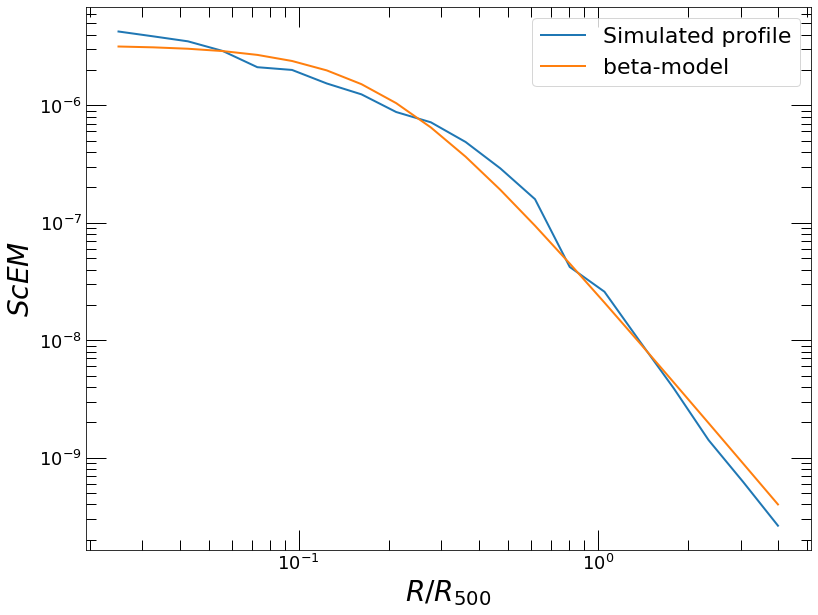

In [139]:
from scipy.optimize import curve_fit

nprof = 8

plt.style.use('MyStyle')

plt.clf()

plt.plot(xgrid_ext, profs[nprof,:len(xgrid_ext)], label='Simulated profile')

pars = curve_fit(beta_model, xgrid_ext[:11], np.log10(profs[nprof,:11]), bounds=(0,1))

print('Fitted core radius: %g R500' % (np.abs(pars[0][1])))

plt.plot(xgrid_ext, 10.**(beta_model(xgrid_ext, pars[0][0], pars[0][1])), label='beta-model')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('$R/R_{500}$')
plt.ylabel('$ScEM$')

plt.legend(fontsize=22)


In [132]:

all_rc = np.empty(nsim)

for i in range(nsim):

    pars = curve_fit(beta_model, xgrid_ext[:11], np.log10(profs[i,:11]), bounds=(0,1))

    all_rc[i] = np.abs(pars[0][1])
    
    

Text(0.5, 0, '$R_c/R_{500}$')

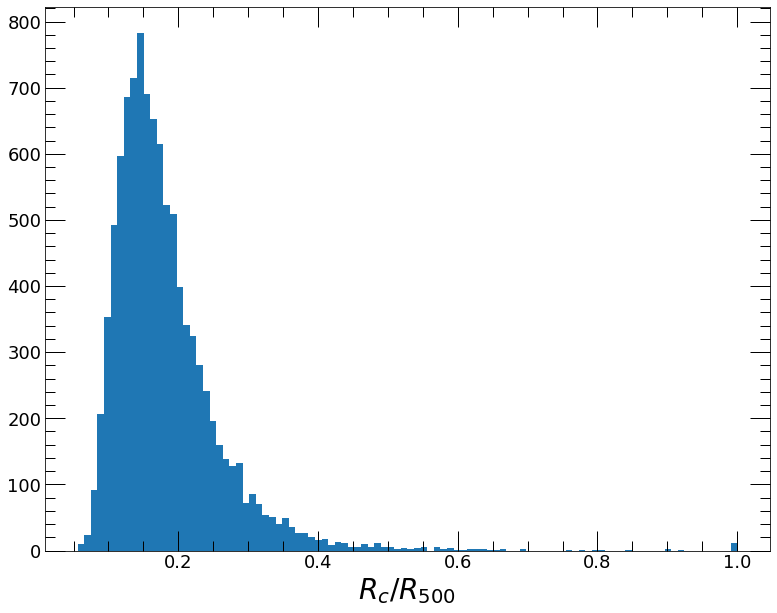

In [134]:
plt.clf()

plt.hist(all_rc, bins=100)

plt.xlabel('$R_c/R_{500}$')